# Q1 

In [13]:
import pandas as pd
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|', index_col='user_id')
users.head()
users.groupby('occupation')['age'].mean()


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [8]:
f1=users[users['gender']=='M'].groupby('occupation').count()['gender']
f2=users.groupby('occupation').count()['gender']
r=(f1/f2)*100
r.sort_values(ascending=True)#for printing female
r.sort_values(ascending=False)#male

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

In [11]:
users.groupby('occupation').age.agg([min,max])# maximum and minimum ages
users.groupby(['occupation', 'gender'])['age'].mean()#mean

#presenting the mean age
g1=users[users['gender']=='M'].groupby('occupation').count()['gender']
g2=users.groupby('occupation').count()['gender']
r=pd.DataFrame((g1/g2)*100)
r.columns=[('M')]
r

,Q
occupation,
administrator,54.430380
artist,53.571429
doctor,100.000000
educator,72.631579
engineer,97.014925
entertainment,88.888889
executive,90.625000
healthcare,31.250000
homemaker,14.285714


In [19]:
#percentage
g3=users[users['gender']=='F'].groupby('occupation').count()['gender']
g2=users.groupby('occupation').count()['gender']
r2=pd.DataFrame((g3/g2)*100)
r2.columns=['F']
r2['M']=r['M']
r2

,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


# Q2 Euro Teams

In [21]:
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro = pd.read_csv(url)
euro.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [30]:
euro['Goals']#number
euro['Team'].count()#count
len(euro.columns)#length
discipline=euro[['Team','Yellow Cards','Red Cards']]
discipline.head()
discipline.sort_values(by=['Red Cards','Yellow Cards'])
euro[euro['Goals']>6]['Team']
euro[euro['Team'].str.startswith('G')]['Team']
euro.iloc[:, : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [31]:
euro.iloc[ : , : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [32]:
euro.loc[euro.Team.isin(['England','Italy','Russia']),
         'Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# Q3 Housing

In [35]:
import numpy as np
import pandas as pd
first=pd.Series(np.random.randint(1,4,100))
second=pd.Series(np.random.randint(1,3,100))
third=pd.Series(np.random.randint(10000,30000,100))
data=pd.concat([first,second,third],axis=1)
df=pd.DataFrame(data)
print(df)

    0  1      2
0   2  2  11854
1   2  2  13037
2   2  2  15967
3   3  1  27462
4   2  1  23866
.. .. ..    ...
95  3  1  19150
96  3  2  22659
97  1  2  27008
98  2  1  18172
99  2  2  18483

[100 rows x 3 columns]


In [36]:
df.rename(columns={0:'bedrs',1:'bathrs',2:'price_sqr_meter'},inplace=True)
print(df)

    bedrs  bathrs  price_sqr_meter
0       2       2            11854
1       2       2            13037
2       2       2            15967
3       3       1            27462
4       2       1            23866
..    ...     ...              ...
95      3       1            19150
96      3       2            22659
97      1       2            27008
98      2       1            18172
99      2       2            18483

[100 rows x 3 columns]


In [38]:
bigcolumn=pd.concat([first,second,third])
bigcolumn
bigcolumn.reset_index(drop=True)

0          2
1          2
2          2
3          3
4          2
       ...  
295    19150
296    22659
297    27008
298    18172
299    18483
Length: 300, dtype: int32

# Q4 Wind Statistics

In [42]:
import pandas as pd
import numpy as n
data = pd.read_csv(r"C:\Users\sandr\OneDrive\Desktop\wind.csv")
data


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [55]:
with open(r"C:\Users\sandr\Downloads\wind.txt",'r') as txt_file:
    lines = txt_file.readlines()
data1 = [line.strip().split('\t') for line in lines]
import csv

with open(r'wind1.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data1)
data1


[['Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL'],
 ['61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04'],
 ['61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83'],
 ['61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71'],
 ['61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  8.63  1.79  5.83  5.88  5.46 10.88'],
 ['61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 11.92  6.54 10.92 10.34 12.92 11.83'],
 ['61  1  6 13.21  8.12  9.96  6.67  5.37  4.50 10.67  4.42  7.17  7.50  8.12 13.17'],
 ['61  1  7 13.50 14.29  9.50  4.96 12.29  8.33  9.17  9.29  7.58  7.96 13.96 13.79'],
 ['61  1  8 10.96  9.75  7.62  5.91  9.62  7.29 14.29  7.62  9.25 10.46 16.62 16.46'],
 ['61  1  9 12.58 10.83 10.00  4.75 10.37  6.79  8.04 10.13  7.79  9.08 13.04 15.37'],
 ['61  1 10 13.37 11.12 19.50  8.33  9.71  6.54 11.42  7.79  8.54  9.00  8.58 11.83'],
 ['61  1 11 10.58  9.87  8.42  2.79  8.71  

# #Q5


In [60]:
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [65]:
len(chipo)#number of observations in the dataset
len(chipo.columns)# the number of columns in the dataset
chipo.columns#name of all the columns
chipo.index   # dataset indexed

chipo.item_name.value_counts().head(1)#most-ordered item

Chicken Bowl    726
Name: item_name, dtype: int64

In [66]:
#most ordered item in the choice_description column
chipo.choice_description.value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

In [67]:
#items were orderd in total
len(chipo.item_name.unique())

50

In [68]:
chipo['item_price'].str.replace('$', '').astype(float)

C:\Users\sandr\AppData\Local\Temp\ipykernel_34900\885186699.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'].str.replace('$', '').astype(float)


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [70]:
chipo["item_price"].dtype
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

Total revenue: $2.39 $3.39 $3.39 $2.39 $16.98 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $17.98 $1.69 $17.50 $17.50 $4.45 $

In [72]:
chipo['order_id'].nunique()
len(chipo["item_name"].unique())


50

In [80]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
selected_columns = chipo[['order_id', 'quantity', 'item_price']]
selected_columns['item_price'] = selected_columns['item_price'].apply(lambda x: float(x[1:]))
selected_columns['total_price'] = selected_columns['quantity'] * selected_columns['item_price']
total_revenue_per_order = selected_columns.groupby('order_id')['total_price'].sum()

C:\Users\sandr\AppData\Local\Temp\ipykernel_34900\2205792587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['item_price'] = selected_columns['item_price'].apply(lambda x: float(x[1:]))
C:\Users\sandr\AppData\Local\Temp\ipykernel_34900\2205792587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['total_price'] = selected_columns['quantity'] * selected_columns['item_price']


In [82]:
total_revenue_per_order#What is the average revenue amount per order

order_id
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: total_price, Length: 1834, dtype: float64

# Q6

In [85]:
url=pd.read_csv(r"C:\Users\sandr\Downloads\us-marriages-divorces-1867-2014.csv")
import matplotlib.pyplot as plt
url.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


Text(0, 0.5, 'Marraiges & Divorcers per capita')

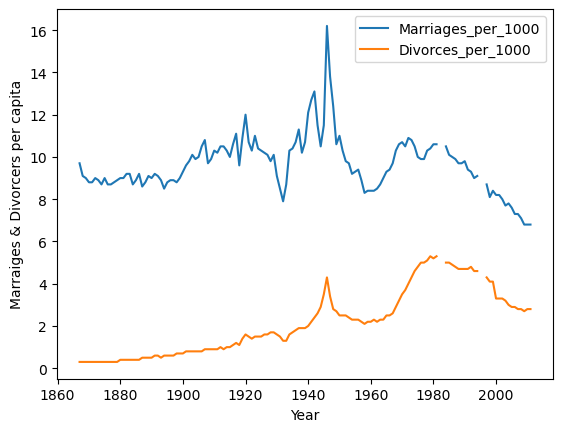

In [87]:
ax=url.plot(x='Year',y=['Marriages_per_1000','Divorces_per_1000'])
ax.set_xlabel('Year')
ax.set_ylabel('Marraiges & Divorcers per capita')

# Q7

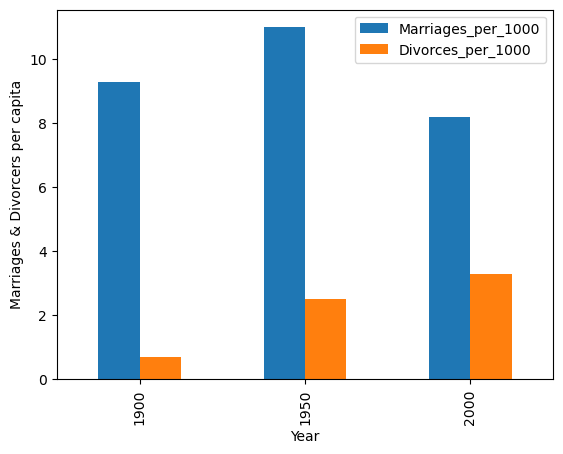

In [90]:
b=url[(url['Year'].isin([1900,1950,2000]))]
x=b.plot.bar(x='Year',y=['Marriages_per_1000','Divorces_per_1000'],xlabel='Year',ylabel='Marriages & Divorcers per capita')

# Q8

In [92]:
actor=pd.read_csv(r"C:\Users\sandr\Downloads\actor_kill_counts.csv")
actor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


Text(0.5, 0, 'Kill Count')

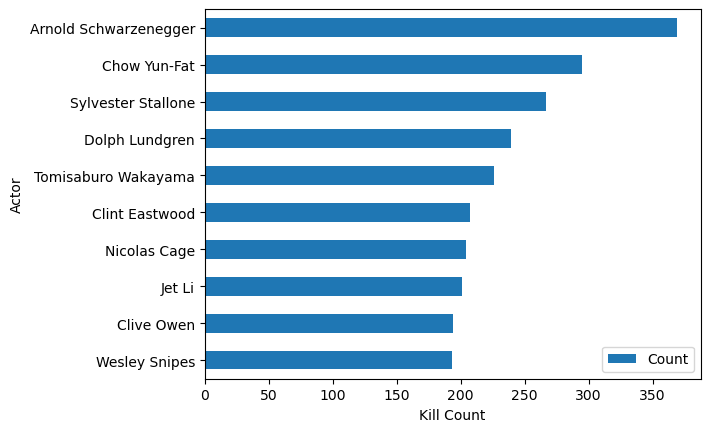

In [94]:
actor.shape
a=actor.set_index('Actor').sort_values('Count').plot(kind='barh')
a.set_xlabel('Kill Count')

# Q9

In [96]:
roman=pd.read_csv(r"C:\Users\sandr\Downloads\roman-emperor-reigns.csv")
roman.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


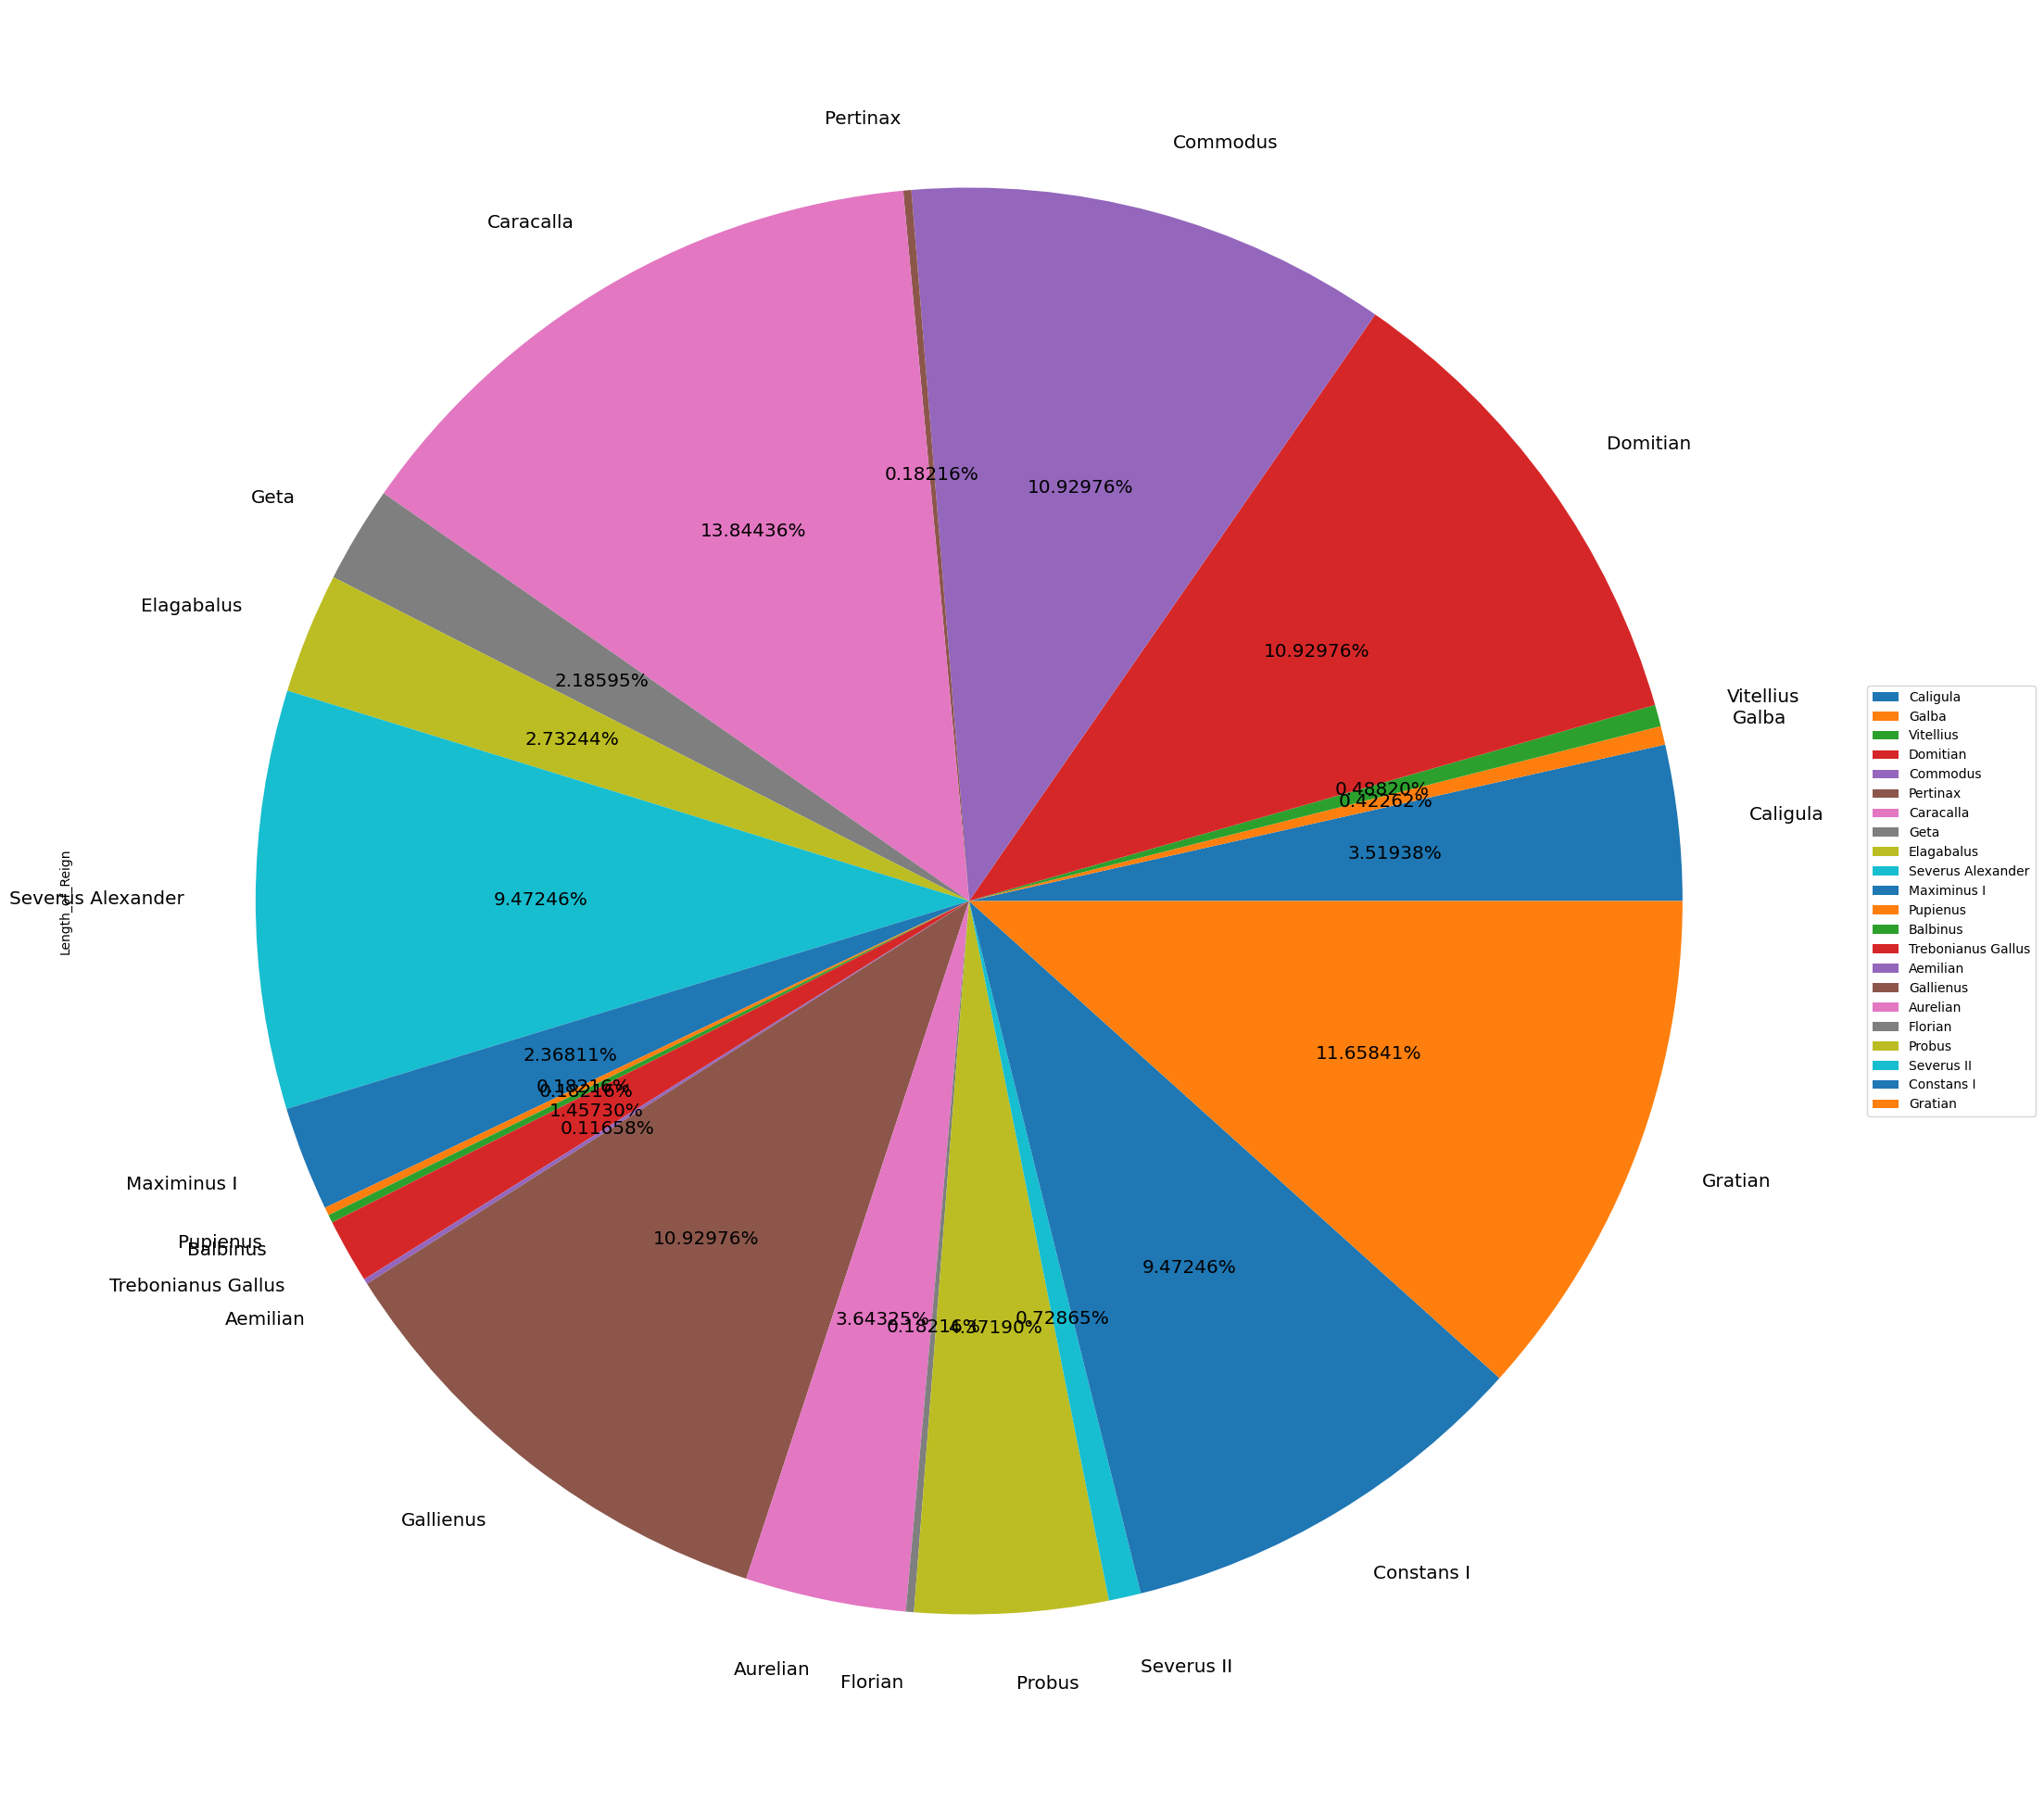

In [103]:
r1=roman[(roman['Cause_of_Death']=='Assassinated')].set_index('Emperor')
r=r1.plot(kind='pie',x='Emperor',y='Length_of_Reign',figsize=(25,25),autopct='%1.5f%%',fontsize='x-large').legend(bbox_to_anchor=(1, 0.5), loc='center left')

# Q10

In [106]:
import seaborn as sns
cs=pd.read_csv(r"C:\Users\sandr\Downloads\arcade-revenue-vs-cs-doctorates.csv")
cs.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


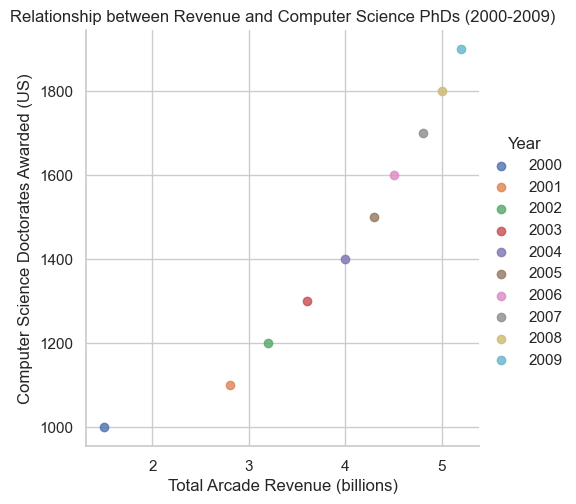

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Total Arcade Revenue (billions)': [1.5, 2.8, 3.2, 3.6, 4.0, 4.3, 4.5, 4.8, 5.0, 5.2],
    'Computer Science Doctorates Awarded (US)': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
})
sns.set(style='whitegrid')
sns.lmplot(
    x='Total Arcade Revenue (billions)',
    y='Computer Science Doctorates Awarded (US)',
    data=data,
    hue='Year',
    fit_reg=False
)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Revenue and Computer Science PhDs (2000-2009)')
plt.show()